In [ ]:
# Jalankan dari root project (folder yg berisi TK4BioInfo/ dan wm.fasta)
import os, sys
sys.path.append(os.path.abspath("."))

from Bio import SeqIO
from TK4BioInfo.phylogene.distances import compute_distance_matrix
from TK4BioInfo.phylogene.tree_builder import NeighborJoining, UPGMA
from TK4BioInfo.phylogene.tree_io import write_tree  # atau to_newick
from TK4BioInfo.phylogene.tree_plot import plot_tree

# 1) Baca FASTA
aln  = list(SeqIO.parse("sequences.fasta", "fasta"))
seqs = {rec.id: str(rec.seq).upper() for rec in aln}
taxa = list(seqs.keys())

# 2) Hitung jarak (pakai arg 'method', bukan 'model')
D, taxa = compute_distance_matrix(seqs, method="k80", pairwise_deletion=True, backend="cpu", n_jobs=4)

# 3) build tree
nj    = NeighborJoining(D, taxa).build_tree()
upgma = UPGMA(D, taxa).build_tree()


# 4) Tulis Newick (butuh TreeNode)
write_tree(nj,    "nj_python.nwk")
write_tree(upgma, "upgma_python.nwk")
print("OK: nj_python.nwk & upgma_python.nwk ditulis.")


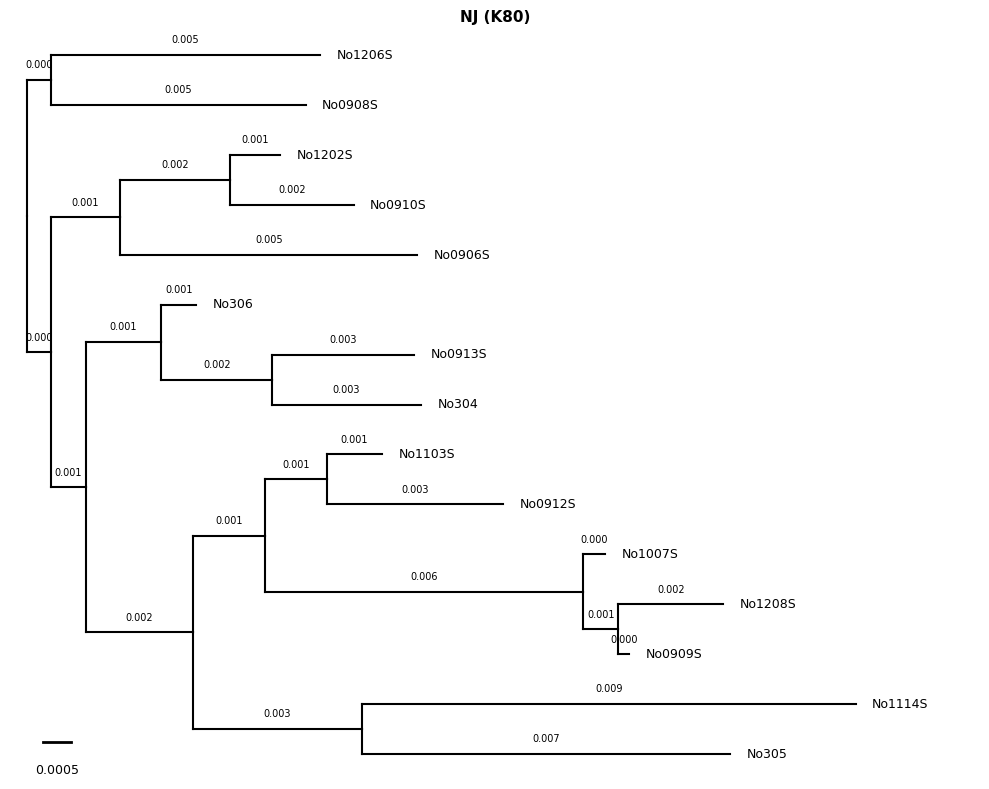

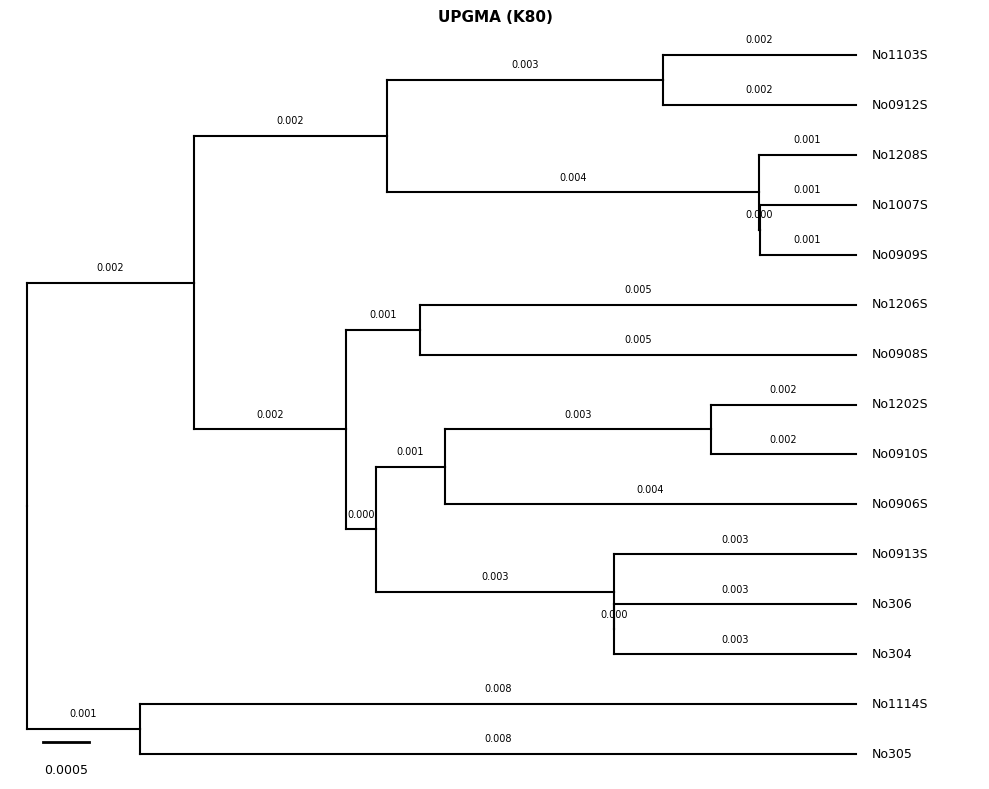

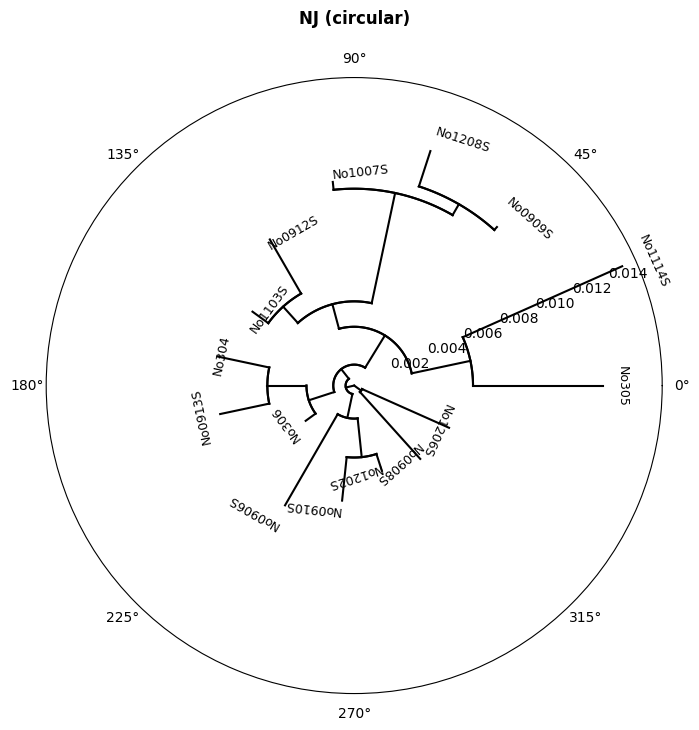

In [3]:
from TK4BioInfo.phylogene.tree_plot import plot_tree, plot_phylo
import matplotlib.pyplot as plt

fig1 = plot_tree(tree_nj, title="NJ (K80)", show_branch_lengths=True, font_size=9)
fig1.savefig("nj_python_rect.png", dpi=300, bbox_inches="tight")

fig2 = plot_tree(tree_upgma, title="UPGMA (K80)", show_branch_lengths=True, font_size=9)
fig2.savefig("upgma_python_rect.png", dpi=300, bbox_inches="tight")

# Optional circular
fig3 = plot_phylo(tree_nj, layout="circular", title="NJ (circular)")
fig3.savefig("nj_python_circ.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
from Bio import SeqIO
from TK4BioInfo.phylogene.msa import progressive_msa, write_fasta

aln  = list(SeqIO.parse("sequences_complete.fasta", "fasta"))
seqs = {rec.id: str(rec.seq).upper() for rec in aln}
taxa = list(seqs.keys())

# CPU, NJ guide tree, jarak K80 (biar cocok sama R), global progressive
msa = progressive_msa(
    seqs,
    mode="global",
    distance_method="k80",
    tree_method="nj",
    backend="cpu",
    n_jobs=5,
    verbose=True
)


print(msa.order)
print(msa.guide_newick)


[MSA] Progressive MSA
Sequences: 108
Mode: global | Distance: k80 | Tree: nj
Gap: open=10.0, ext=0.5

[MSA] Computing distances (k80)... [WARN] inf found done (108x108)
[MSA] Building tree (NJ)... done
[MSA] Progressive: 107 steps


[MSA] Large: 29782x29782 (~3.5GB)
[MSA] Banded (band=1489)...
      Column scores... DP matrix (29782x29782, band=1489)...
      [ 16.8%] row 5000/29782
      [ 33.6%] row 10000/29782
